In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use("seaborn-poster")
plt.rcParams['text.usetex'] = True
#plt.rcParams["figure.figsize"] = (20,18)

# Cantor Set

In [2]:
def generate_cantor_set1(start, end, stage):
    if stage == 0:
        return [(start, end)]
    
    subinterval_length = (end - start) / 3
    left_end = start + subinterval_length
    right_start = end - subinterval_length
    segments = generate_cantor_set1(start, left_end, stage - 1)
    segments += generate_cantor_set1(right_start, end, stage - 1)
    return segments

In [3]:
def plot_cantor_set(segments,stage):
    plt.figure(figsize=(5, 0.12))    
    for segment in segments:
        plt.plot(segment, [0, 0], 'k')
    
    plt.text(-0.2,-0.005,'Stage {}'.format(stage))
    plt.xlim(0, 1)
    plt.ylim(-0.1, 0.1)
    plt.axis('off')
    plt.show()

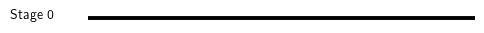

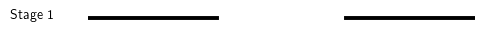

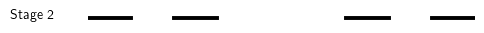

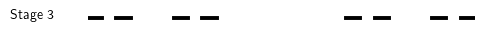

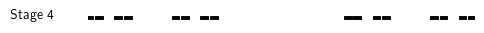

In [4]:
# Set the initial interval
start = 0
end = 1
stages = 4 # Set the number of stages
for stage in range(stages+1):
    segments = generate_cantor_set1(start, end, stage) # Generate the Cantor set
    plot_cantor_set(segments,stage) # Plot the Cantor set

In [5]:
def generate_cantor_set2(start, end, stage):
    if stage == 0:
        return [(start, end)]
    
    subinterval_length = (end - start) / 5
    left_end = start + subinterval_length
    right_start = end - subinterval_length    
    segments = generate_cantor_set2(start, left_end, stage - 1)
    segments += generate_cantor_set2(right_start, end, stage - 1)
    return segments

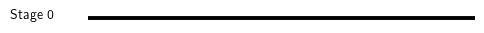

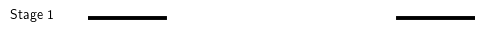

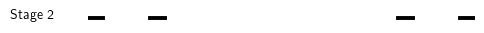

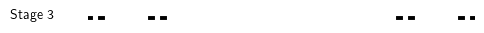

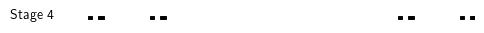

In [6]:
# Set the initial interval
start = 0
end = 1
stages = 4 # Set the number of stages

for stage in range(stages+1):
    segments = generate_cantor_set2(start, end, stage) # Generate the Cantor set
    plot_cantor_set(segments,stage) # Plot the Cantor set

# Lévy Fractal

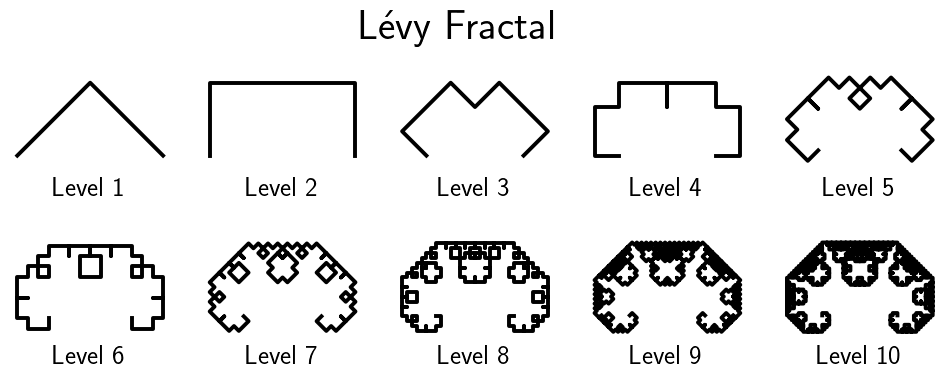

In [39]:
def Lévy_Fractal(points, angle, level, length):
    if level == 0:
        end_x = points[-1][0] + length * np.cos(angle)
        end_y = points[-1][1] + length * np.sin(angle)
        points.append((end_x, end_y))
    else:
        sub_length = length / np.sqrt(2)
        new_angle = angle + np.pi / 4
        Lévy_Fractal(points, new_angle, level - 1, sub_length)
        new_angle = angle - np.pi / 4
        Lévy_Fractal(points, new_angle, level - 1, sub_length)

# Set the initial parameters
start_x, start_y = 0, 0
angle = 0
levels = 10
length = 1
fig=plt.figure(figsize=(12, 4))
fig.suptitle("Lévy Fractal",fontsize=30)
for level in range(1,levels+1):
    # Generate the points of the Lévy fractal
    points = [(start_x, start_y)]
    Lévy_Fractal(points, angle, level, length)

    # Extract x and y coordinates from the points
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]

    # Plot the Lévy fractal
    plt.subplot(2,5,level)
    plt.plot(x_coords, y_coords, 'k')
    plt.axis('equal')
    plt.axis('off')
    plt.title("Level {}".format(level),y=-0.1)
plt.show()

# Pascal's Triangle

In [8]:
row=8
import math
for i in range(0,row):
    for j in range(row-i+1):
        print('  ',end=' ')
    for k in range(0, i+1):
        c=math.factorial(i)//(math.factorial(k)*math.factorial(i-k))
        if c%2==0:
            print(' ','*',' ',end=' ')
        else:
            # first value in a line is always 1
            print(' ', c,' ',end=' ')
        #print(c, end=' ')
    print()

                             1   
                          1     1   
                       1     *     1   
                    1     3     3     1   
                 1     *     *     *     1   
              1     5     *     *     5     1   
           1     *     15     *     15     *     1   
        1     7     21     35     35     21     7     1   


In [9]:
row=16
import math
for i in range(0,row):
    for j in range(row-i+1):
        print('  ',end=' ')
    for k in range(0, i+1):
        c=math.factorial(i)//(math.factorial(k)*math.factorial(i-k))
        if c%2==0:
            print(' ',' ',' ',end=' ')
        else:
            # first value in a line is always 1
            print(' ','.',' ',end=' ')
        #print(c, end=' ')
    print()

                                                     .   
                                                  .     .   
                                               .           .   
                                            .     .     .     .   
                                         .                       .   
                                      .     .                 .     .   
                                   .           .           .           .   
                                .     .     .     .     .     .     .     .   
                             .                                               .   
                          .     .                                         .     .   
                       .           .                                   .           .   
                    .     .     .     .                             .     .     .     .   
                 .                       .                       .                       .   
            

## Barnsley's Fern Fractal

$\begin{equation*}(x,y)_{n+1} = \left\{\begin{array}{rl} (0.5, 0.27y_n), & r < 0.02,\\
                                                (−0.139x_n + 0.263y_n + 0.57, \\
                                       0.246x_n + 0.224y_n − 0.036), & 0.02 \le r \le 0.17,\\
                                        (0.17x_n − 0.215y_n + 0.408, \\
                                       0.222x_n + 0.176y_n + 0.0893), & 0.17 < r \le 0.3,\\
                                         (0.781x_n + 0.034y_n + 0.1075,\\
                                      −0.032x_n + 0.739y_n + 0.27), & 0.3 < r < 1.\end{array} \right.\end{equation*}$

In [10]:
def barnsley_fern(n_points,x=0.1,y=0.1):
    points = [(x, y)]
    for _ in range(n_points):
        r = np.random.random()
        if r < 0.02:
            x, y = 0.5, 0.27 * y
        elif 0.02 <= r < 0.17:
            x, y = (-0.139 * x + 0.263 * y + 0.57, 0.246 * x + 0.224 * y - 0.036)
        elif 0.17 <= r < 0.3:
            x, y = (0.17 * x - 0.215 * y + 0.408, 0.222 * x + 0.176 * y + 0.0893)
        else:
            x, y = (0.781 * x + 0.034 * y + 0.1075, -0.032 * x + 0.739 * y + 0.27)
        points.append((x, y))
    return points

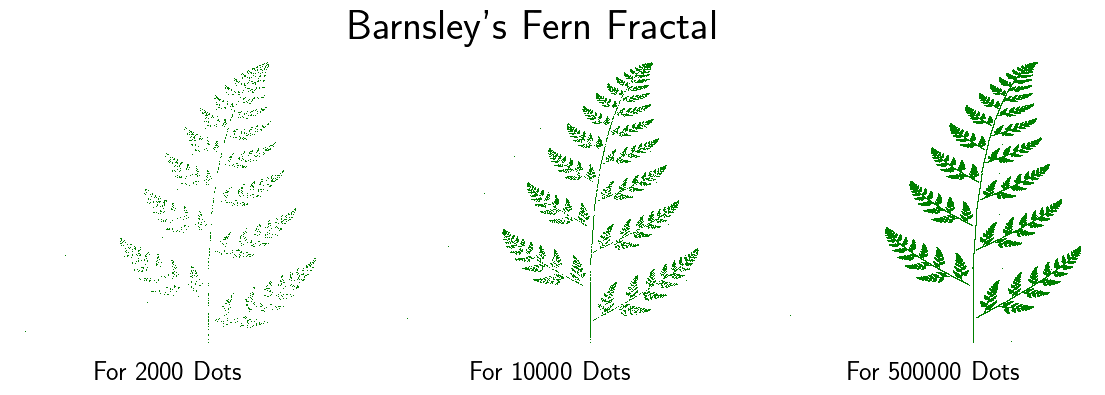

In [11]:
N=[2000, 10000, 500000]
fig=plt.figure(figsize=(14,4))
fig.suptitle(r"Barnsley's Fern Fractal",fontsize=30)
for i in range(len(N)):
    plt.subplot(1,3,i+1)
    fern_points = barnsley_fern(N[i])
    x_values = [point[0] for point in fern_points]
    y_values = [point[1] for point in fern_points]
    plt.plot(x_values, y_values, 'g,')
    plt.title('For {} Dots'.format(N[i]),y=-0.1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("off")
plt.show()

# Self-Affin Tree

$\begin{equation*}(x,y)_{n+1} = \left\{\begin{array}{rl} (0.05x_n, 0.6y_n), & 10\% , \\
(0.05x_n, \\ −0.5y_n + 1.0),& 10\% ,\\
(0.46x_n − 0.15y_n,\\ 0.39x_n + 0.38y_n + 0.6), & 20\% ,\\
(0.47x_n − 0.15y_n,\\ 0.17x_n + 0.42y_n + 1.1), & 20\% ,\\
(0.43x_n + 0.28y_n,\\ −0.25x_n + 0.45y_n + 1.0), & 20\% ,\\
(0.42x_n + 0.26y_n,\\ −0.35x_n + 0.31y_n + 0.7), & 20\% .\end{array} \right.\end{equation*}$

In [12]:
def Trees(n_points,x=0.1,y=0.1):
    points = [(x, y)]

    for _ in range(n_points):
        r = np.random.random()

        if r < 0.10:
            x, y = 0.05 * x, 0.6 * y
        elif 0.10 <= r < 0.20:
            x, y = 0.05 * x, -0.5 * y + 1.0
        elif 0.20 <= r < 0.40:
            x, y = 0.46 * x - 0.15 * y, 0.39 * x + 0.38 * y + 0.6
        elif 0.40 <= r < 0.60:
            x, y = 0.47 * x - 0.15 * y, 0.17 * x + 0.42 * y + 1.1
        elif 0.60 <= r < 0.80:
            x, y = 0.43 * x + 0.28 * y, -0.25 * x + 0.45 * y + 1.0
        else:
            x, y = 0.42 * x + 0.26 * y, -0.35 * x + 0.31 * y + 0.7
        points.append((x, y))
    return points

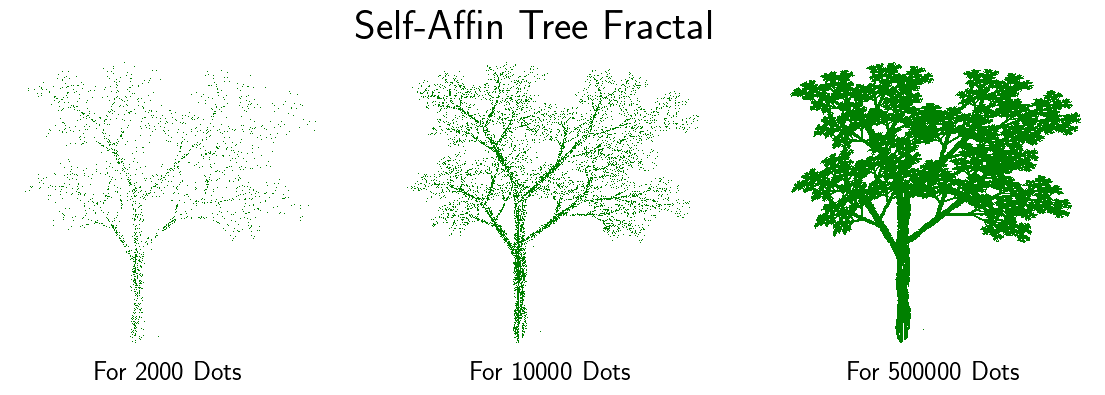

In [13]:
N=[2000, 10000, 500000]
fig=plt.figure(figsize=(14,4))
fig.suptitle(r"Self-Affin Tree Fractal",fontsize=30)
for i in range(len(N)):
    plt.subplot(1,3,i+1)
    fern_points = Trees(N[i])
    x_values = [point[0] for point in fern_points]
    y_values = [point[1] for point in fern_points]
    plt.plot(x_values, y_values, 'g,')
    plt.title('For {} Dots'.format(N[i]),y=-0.1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("off")
plt.show()

In [14]:
def plot_coords(coords, bare_plot=False):
    plt.figure(figsize=(4,4))
    if bare_plot:
        plt.axis('off')        # Turns off the axis markers.
    plt.axes().set_aspect('equal', 'datalim')    # Ensures equal aspect ratio.
    X, Y = zip(*coords)    # Converts a list of coordinates into  lists of X and Y values, respectively.
    plt.plot(X, Y,'g,')
    plt.grid('off')
    plt.axis('equal')
    plt.axis('off')

def print_coords(coords):
    for (x, y) in coords:
        if isnan(x):
            print('<gap>')
        else:
            print('({:.2f}, {:.2f})'.format(x, y))

def transform_sequence(sequence, transformations):
    return ''.join(transformations.get(c, c) for c in sequence)

DEGREES_TO_RADIANS = np.pi / 180

def transform_multiple(sequence, transformations, iterations):
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state

        if command.lower() in 'abcdefghij':        # Move forward (matches a-j and A-J)
            state = (x - np.cos(angle * DEGREES_TO_RADIANS),
                     y + np.sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command.islower():                  # Add a break in the line if command matches a-j
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':                       # Turn clockwise
            state = (x, y, angle + turn_amount)

        elif command == '-':                       # Turn counterclockwise
            state = (x, y, angle - turn_amount)

        elif command == '[':                       # Remember current state
            saved_states.append(state)

        elif command == ']':                       # Return to previous state
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

def l_plot(axiom, transformations, iterations=0, angle=45):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True)         

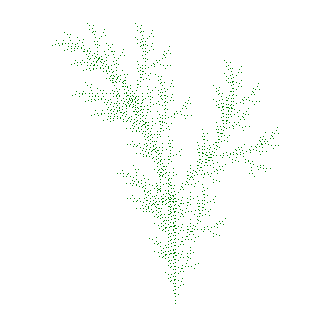

In [15]:
l_plot('F', {'F': 'FF[++F][-FF]'}, 5, 22)

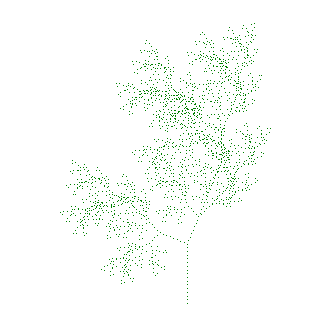

In [16]:
l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

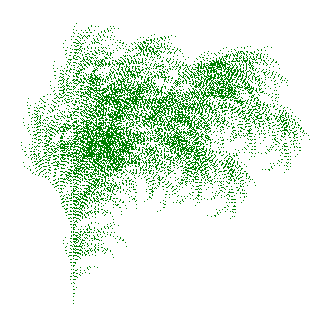

In [17]:
l_plot('X', {'F': 'FX[FX[+XF]]', 'X': 'FF[+XF++X-F[+ZX]][-X++F-X]', 'Z':'[+F-X-F][++ZXo]'}, 5, 20)

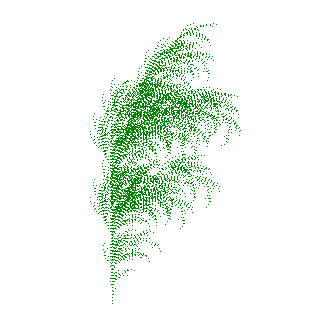

In [18]:
l_plot('F', {'F': 'FX[FX[+XF]]', 'X': 'FF[+XF++X-F[+ZX]][-X++F-X]', 'Z':'[+F-X-F][++ZXo]'}, 5, 20)

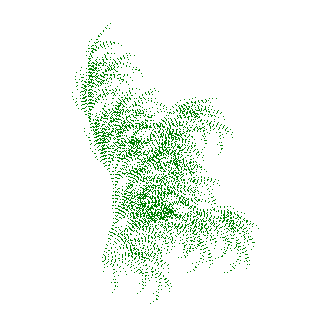

In [19]:
l_plot('Z', {'F': 'FX[FX[+XF]]', 'X': 'FF[+XF++X-F[+ZX]][-X++F-X]', 'Z':'[+F-X-F][++ZXo]'}, 5, 20)

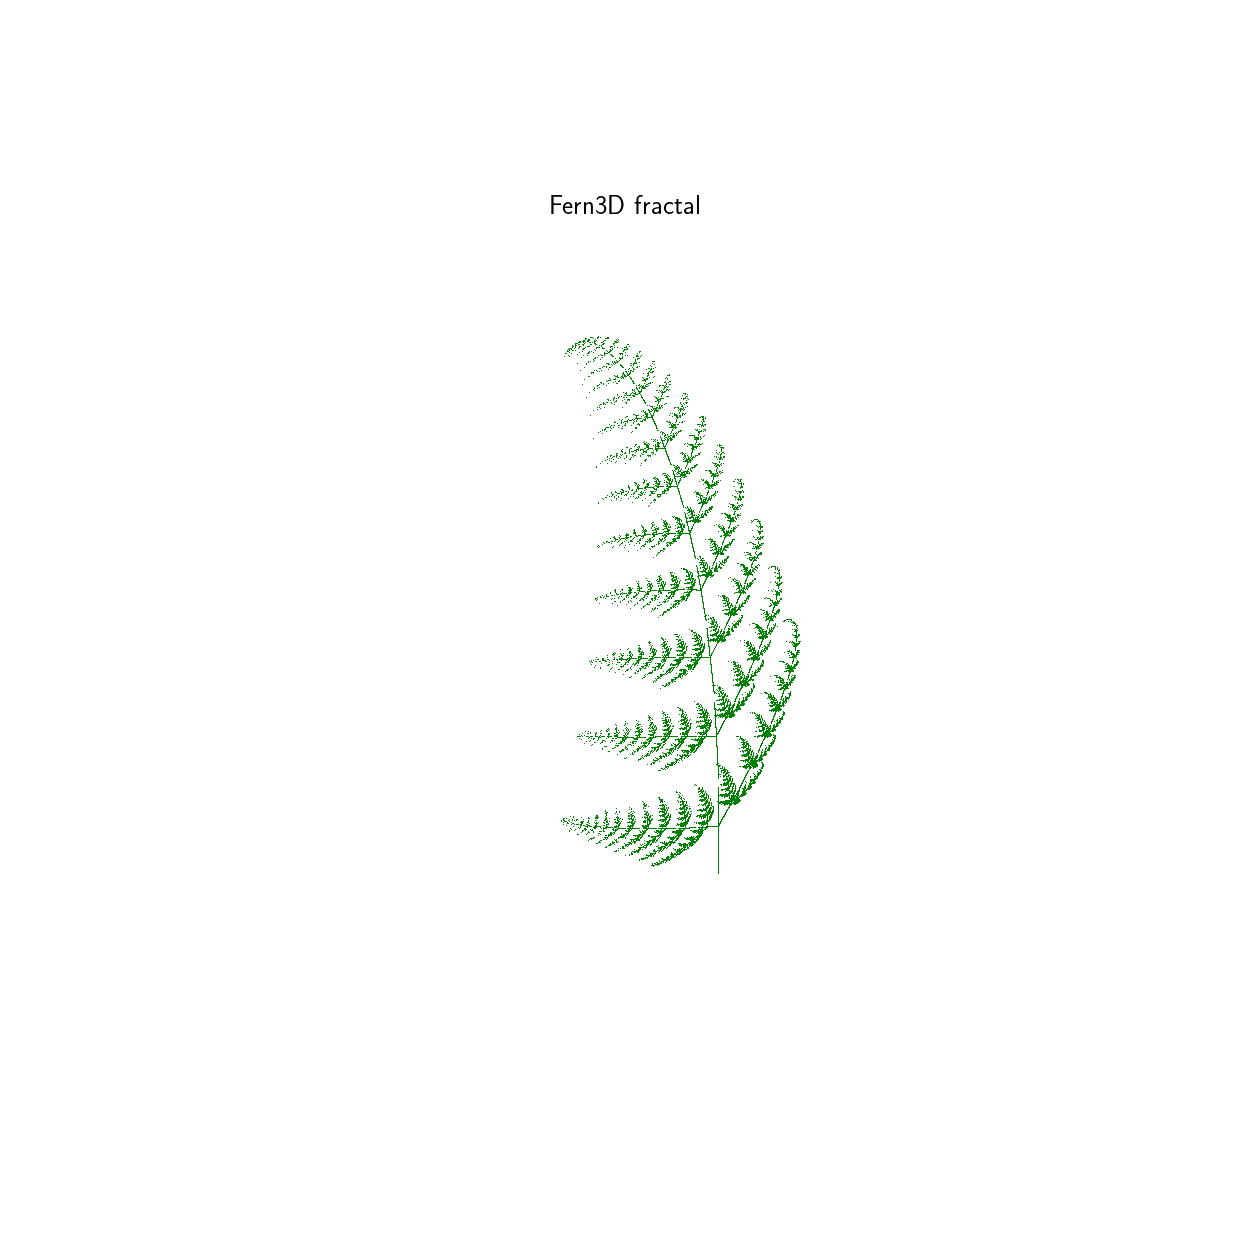

In [20]:
def barnsley_fern3D(n_points):
    x = 0.5
    y = 0.0
    z = -0.2
    xn = 0.0
    yn = 0.0
    x_values,y_values,z_values = [],[],[]

    for _ in range(n_points):
        r = np.random.random()
        if r <= 0.1:
            xn = 0.0
            yn = 0.18 * y
            zn = 0.0
        elif 0.1 < r <= 0.7:
            xn = 0.85 * x
            yn = 0.85 * y + 0.1 * z + 1.6
            zn = -0.1 * y + 0.85 * z
        elif 0.7 < r <= 0.85:
            xn = 0.2 * x - 0.2 * y
            yn = 0.2 * x + 0.2 * y + 0.8
            zn = 0.3 * z
        else:
            xn = -0.2 * x + 0.2 * y
            yn = 0.2 * x + 0.2 * y + 0.8
            zn = 0.3 * z
        x = xn
        y = yn
        z = zn
        xc = 4.0 * x
        yc = 2.0 * y - 7
        zc = z
        x_values.append(xc)
        y_values.append(yc)
        z_values.append(zc)
    return ([x_values,y_values,z_values])
    
x,y,z=barnsley_fern3D(50000)
fig = plt.figure(figsize = (16,16))
ax = plt.axes(projection="3d")
ax.grid('off')
ax.plot3D(z,x,y,'g,')
plt.title("Fern3D fractal",y=0.9)
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.axis('off')
plt.show()

# The Sierpiński Gasket                                                                                                        
To generate our first fractal, we play a game of chance in which we place dots at points picked randomly within a triangle (Bunde and Havlin, 1991).                                                                                                        
Here are the rules (which you should try out in the margins now).                                                                   
1. Draw an equilateral triangle with vertices and coordinates:                                                                    
vertex 1: (a1 , b1); vertex2:(a2 , b2); vertex3:(a3 , b3) . (16.3)                                                                
2. Place a dot at an arbitrary point P = (x0 , y0) within this triangle.                                                        
3. Find the next point by selecting randomly the integer 1, 2, or 3:                                                               
a) If 1, place a dot halfway between P and vertex 1.                                                                          
b) If 2, place a dot halfway between P and vertex 2.                                                                          
c) If 3, place a dot halfway between P and vertex 3.                                                                            
4. Repeat the process using the last dot as the new P.                                                                                
Mathematically, the coordinates of successive points are given by the formulas                                                   
$\qquad\qquad\displaystyle(x_{k+1}, y_{k+1}) = \frac{(x_k , y_k) + (a_n , b_n)}{2} , n = \text{integer }(1 + 3r_i ) $        
where $r_i$ is a random number between 0 and 1 and where the integer function outputs the closest integer smaller than or equal to the argument.

In [21]:
def Sierpiński(num_points):
    a1, b1 = 0, 0
    a2, b2 = 2, 0
    a3, b3 = 1, np.sqrt(3)
    x0, y0 = 1, 1
    x_points = [x0]
    y_points = [y0]

    for _ in range(num_points):
        r = np.random.random() # Random number between 0 and 1
        n = int(1 + 3 * r) # Randomly select 1, 2, or 3
        # Calculate the new point coordinates
        if n == 1:
            an = (a1 - x_points[-1]) / 2
            bn = (b1 - y_points[-1]) / 2
        elif n == 2:
            an = (a2 - x_points[-1]) / 2
            bn = (b2 - y_points[-1]) / 2
        else:
            an = (a3 - x_points[-1]) / 2
            bn = (b3 - y_points[-1]) / 2
        x_new = x_points[-1] + an
        y_new = y_points[-1] + bn
        x_points.append(x_new)
        y_points.append(y_new)
    return ([x_points, y_points])

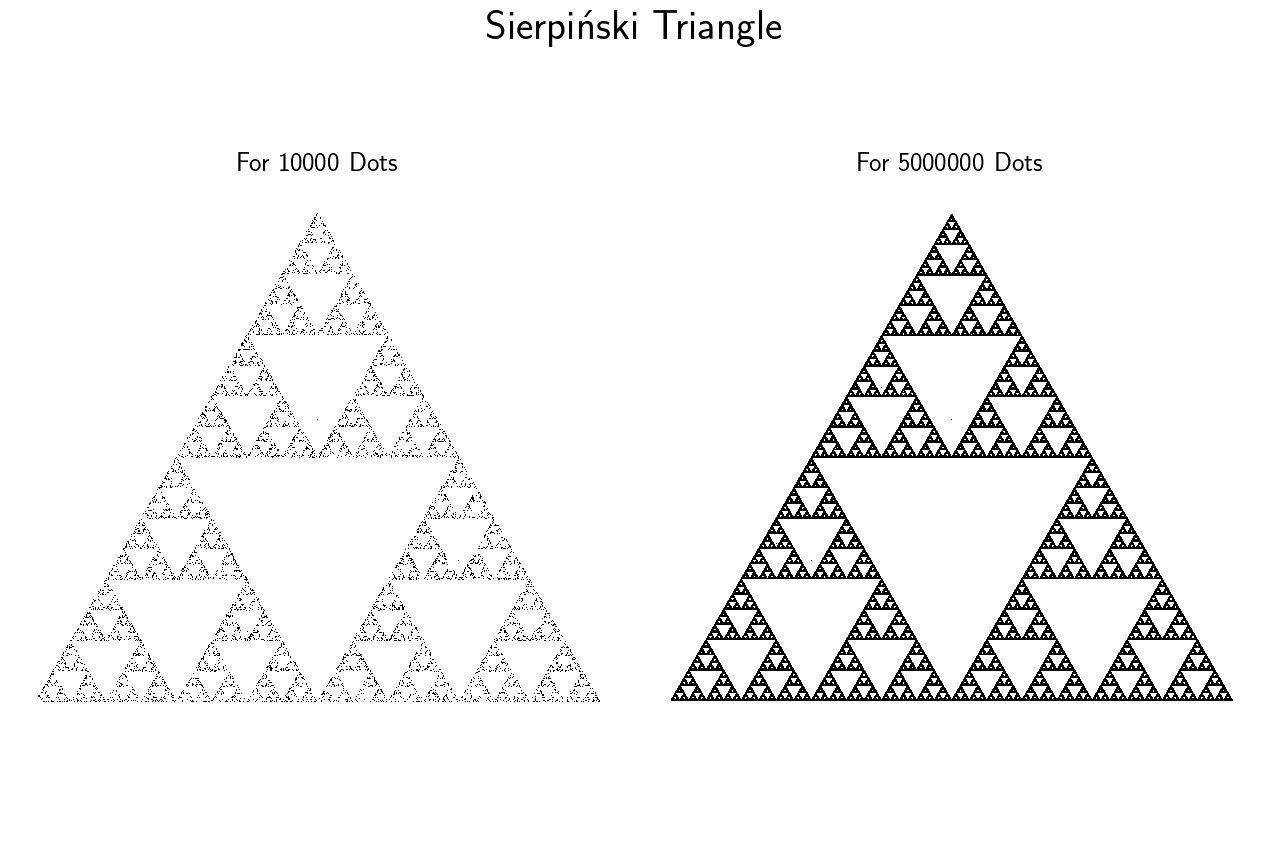

In [41]:
N=[10000, 5000000]
fig=plt.figure()
fig.suptitle("Sierpiński Triangle",fontsize=30)
for i in range(len(N)):
    plt.subplot(1,2,1+i)
    x, y = Sierpiński(N[i])
    plt.plot(x, y, 'k,')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.axis('off')
    plt.tight_layout()
    plt.title('For {} Dots '.format(N[i]),y=0.85)
plt.show()

Here are the rules (which you should try out in the margins now).                                                                   
1. Draw an equilateral triangle with vertices and coordinates:                                                                    
vertex 1: (a1 , b1); vertex2:(a2 , b2); vertex3:(a3 , b3); vertex 4: (a4 , b4); vertex5:(a5 , b5); vertex6:(a6 , b6); vertex7:(a7 , b7); vertex8:(a8 , b8)                                                                                                             
2. Place a dot at an arbitrary point P = (x0 , y0) within this triangle.                                                        
3. Find the next point by selecting randomly the integer 1, 2, or 3:                                                               
a) If 1, place a dot halfway between P and vertex 1.                                                                          
b) If 2, place a dot halfway between P and vertex 2.                                                                          
c) If 3, place a dot halfway between P and vertex 3.                                                                                   
d) If 4, place a dot halfway between P and vertex 4.                                                                          
e) If 5, place a dot halfway between P and vertex 5.                                                                          
f) If 6, place a dot halfway between P and vertex 6.                                                                                  
g) If 7, place a dot halfway between P and vertex 7.                                                                          
h) If 8, place a dot halfway between P and vertex 8.                                                                                   
4. Repeat the process using the last dot as the new P.                                                                                
Mathematically, the coordinates of successive points are given by the formulas                                                   
$\qquad\qquad\displaystyle(x_{k+1}, y_{k+1}) = \frac{(x_k , y_k) + (a_n , b_n)}{3} , n = \text{integer }(1 + 8r_i ) $        
where $r_i$ is a random number between 0 and 1 and where the integer function outputs the closest integer smaller than or equal to the argument.

In [23]:
def Sierpiński_Square(num_points):
    a1, b1 = -2,-2
    a2, b2 = -2, 2
    a3, b3 =  2,-2
    a4, b4 =  2, 2
    a5, b5 = -2, 0
    a6, b6 =  0,-2
    a7, b7 =  0, 2
    a8, b8 =  2, 0
    x0, y0 =  0, 0
    x_points = [x0]
    y_points = [x0]

    for _ in range(num_points):
        ri = np.random.random() # Random number between 0 and 1
        n = int(1 + 8 * ri) 
        
        if n == 1:
            an = (a1 - 2*x_points[-1]) / 3
            bn = (b1 - 2*y_points[-1]) / 3
        elif n == 2:
            an = (a2 - 2*x_points[-1]) / 3
            bn = (b2 - 2*y_points[-1]) / 3
        elif n == 3:
            an = (a3 - 2*x_points[-1]) / 3
            bn = (b3 - 2*y_points[-1]) / 3
        elif n == 4:
            an = (a4 - 2*x_points[-1]) / 3
            bn = (b4 - 2*y_points[-1]) / 3
        elif n == 5:
            an = (a5 - 2*x_points[-1]) / 3
            bn = (b5 - 2*y_points[-1]) / 3
        elif n == 6:
            an = (a6 - 2*x_points[-1]) / 3
            bn = (b6 - 2*y_points[-1]) / 3
        elif n == 7:
            an = (a7 - 2*x_points[-1]) / 3
            bn = (b7 - 2*y_points[-1]) / 3
        else:
            an = (a8 - 2*x_points[-1]) / 3
            bn = (b8 - 2*y_points[-1]) / 3

        x_new = x_points[-1] + an
        y_new = y_points[-1] + bn

        x_points.append(x_new)
        y_points.append(y_new)
    return ([x_points, y_points])

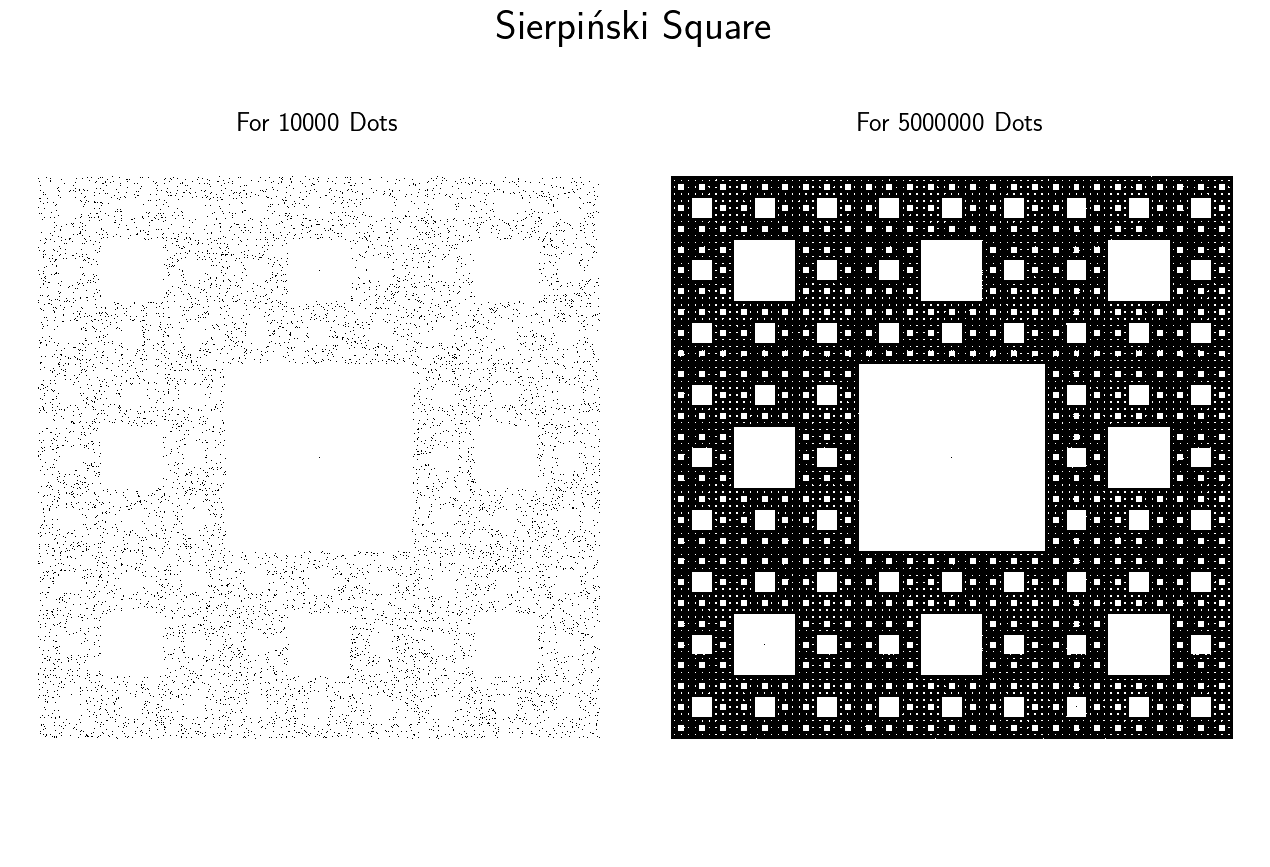

In [24]:
N=[10000, 5000000]
fig=plt.figure()
fig.suptitle("Sierpiński Square",fontsize=30)
for i in range(len(N)):
    plt.subplot(1,2,1+i)
    x, y = Sierpiński_Square(N[i])
    plt.plot(x, y, 'k,')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.axis('off')
    plt.tight_layout()
    plt.title('For {} Dots '.format(N[i]),y=0.9)
plt.show()

In [25]:
def Koch_curve(k):
    n_lines = 4**k
    h = 3**(-k);
    x = [0]*(n_lines+1)
    y = [0]*(n_lines+1)
    x[0], y[0] = 0, 0
    segment=[0] * n_lines
    angle=[0, np.pi/3, -np.pi/3, 0]           # The angles of the four segments.
    for i in range(n_lines):
        m=i
        ang=0
        for j in range(k):
            segment[j] = np.mod(m, 4)
            m = np.floor(m / 4)
            ang = ang + angle[int(segment[j])]
        x[i+1] = x[i] + h*np.cos(ang)
        y[i+1] = y[i] + h*np.sin(ang)
    return x,y

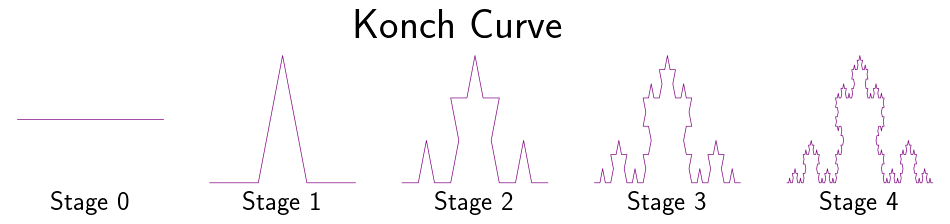

In [26]:
fig=plt.figure(figsize=(12,4))
fig.suptitle('Konch Curve',fontsize=30)
for k in range(5):
    x,y=Koch_curve(k)
    plt.subplot(2,5,k+1)
    plt.plot(x, y,'purple',linewidth=0.5)
    plt.title('Stage {}'.format(k),y=-0.2)
    #plt.axis('equal')
    plt.axis('off')
plt.show()

In [27]:
def inverted_Koch_curve(k):
    n_lines = 4**k
    h = 3**(-k)
    x = [0]*(n_lines+1)
    y = [0]*(n_lines+1)
    x[0], y[0] = 0, 0
    segment = [0] * n_lines
    angle = [0, -np.pi/3, np.pi/3, 0]   # The inverted angles of the four segments.
    for i in range(n_lines):
        m = i
        ang = 0
        for j in range(k):
            segment[j] = np.mod(m, 4)
            m = np.floor(m / 4)
            ang = ang + angle[int(segment[j])]
        x[i+1] = x[i] + h*np.cos(ang)
        y[i+1] = y[i] + h*np.sin(ang)
    return x, y

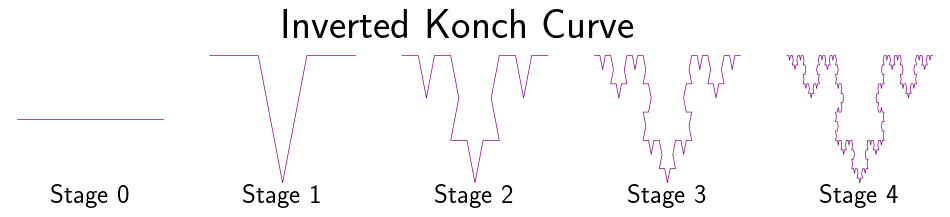

In [28]:
fig=plt.figure(figsize=(12,4))
fig.suptitle('Inverted Konch Curve',fontsize=30)
for k in range(5):
    x,y=inverted_Koch_curve(k)
    plt.subplot(2,5,k+1)
    plt.plot(x, y,'purple',linewidth=0.5)
    plt.title('Stage {}'.format(k),y=-0.15)
    #plt.axis('equal')
    plt.axis('off')
plt.show()

In [29]:
def koch_cantor_snowflake(order, scale=10):
    
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3
            
            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)               # end points
            dp = p2 - p1                             # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

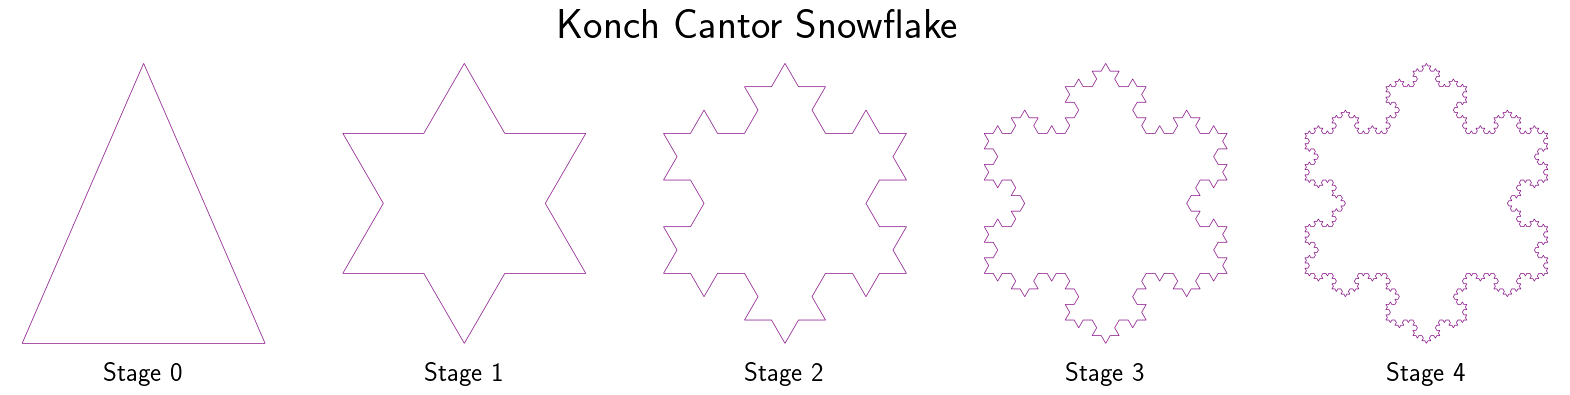

In [30]:
fig=plt.figure(figsize=(20,4))
fig.suptitle('Konch Cantor Snowflake',fontsize=30)
for i in range(5):
    plt.subplot(1,5,i+1)
    x, y = koch_cantor_snowflake(order=i)
    plt.fill(x, y, facecolor='none', edgecolor='purple')
    plt.axis('off')
    plt.title('Stage {}'.format(i),y=-0.1)
plt.show()

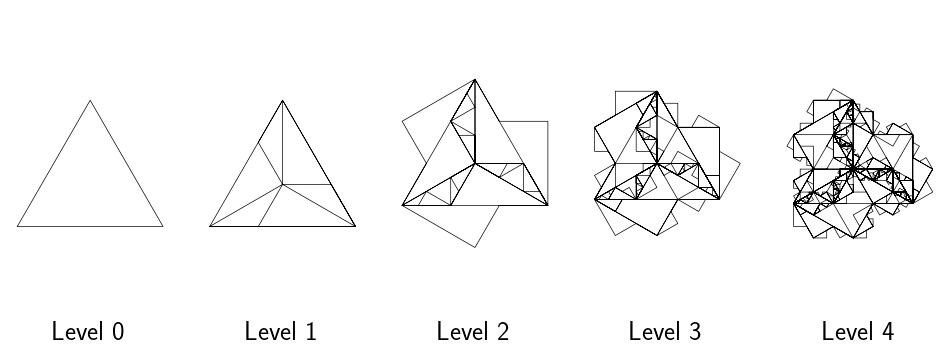

In [31]:
def koch_curve2(start, end, level):
    length = np.linalg.norm(end - start)
    angle = np.angle(end - start)

    if level == 0:
        return [start, end]
    else:
        segment_length = length / 3
        p1 = start
        p2 = start + segment_length * np.exp(1j * angle)
        p3 = p2 + segment_length * np.exp(1j * (angle + np.pi/3))
        p4 = end

        return (
                koch_curve2(p1, p2, level - 1) +
                koch_curve2(p2, p3, level - 1) +
                koch_curve2(p3, p4, level - 1) +
                koch_curve2(p4, p1, level - 1)
               )

def plot_koch_snowflake(level):
    base_triangle = np.array([0 + 0j,
                              1 + 0j,
                              0.5 + 0.5 * np.sqrt(3) * 1j,
                              0 + 0j])
    snowflake_points = []
    for i in range(3):
        start = base_triangle[i]
        end = base_triangle[i + 1]
        points = koch_curve2(start, end, level)
        snowflake_points.extend(points)
    return np.array(snowflake_points)    
    
fig=plt.figure(figsize=(12, 4))    

for i in range(5):
    snowflake_points=plot_koch_snowflake(i)
    plt.subplot(1,5,i+1)
    plt.plot(snowflake_points.real, snowflake_points.imag, 'k',linewidth=0.5)
    plt.axis('equal')
    plt.axis('off')
    plt.title('Level {}'.format(i),y=-0.1)
plt.show()

# Mystery Curve :                                                                                                                  
# $\qquad\qquad\displaystyle{f(t)=e^{it}\bigg[1−\frac{1}{2}e^{ikt}+\frac{i}{3}e^{−ikt}\bigg]}$

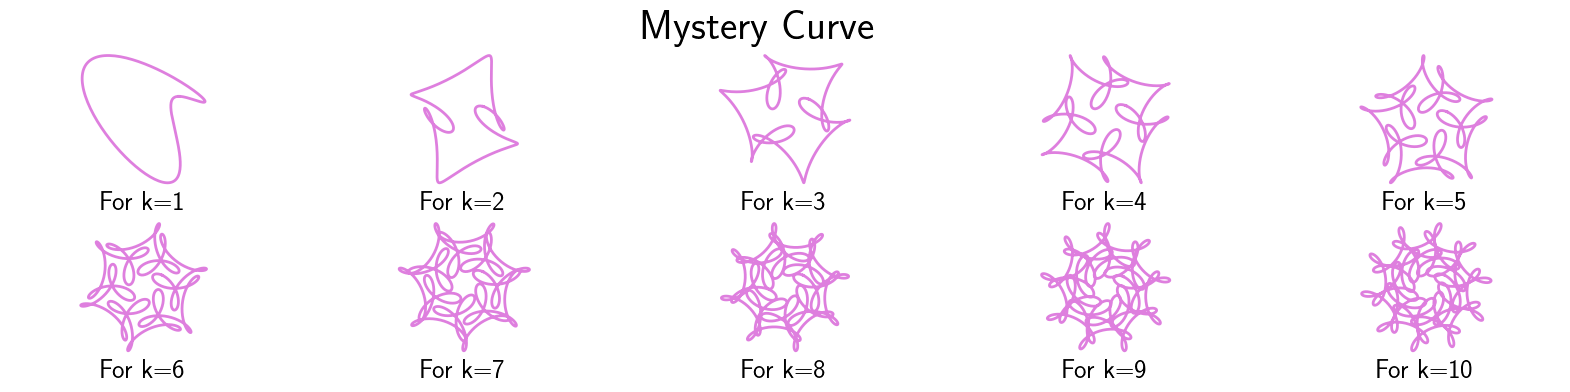

In [32]:
def f(t, k):
    def P(z):
        return 1 - z / 2 - 1 / z**3 / 3j
    return np.exp(1j*t) * P(np.exp(k*1j*t))

# k is supplied as a command line argument.
K = 10      

fig=plt.figure(figsize=(20,4))
fig.suptitle('Mystery Curve',fontsize=30)
for k in range(1,K+1):
    # Choose a grid of t values at a suitable resolution so that the curve is well-represented.
    t = np.linspace(0, 2*np.pi, 200*k+1);
    u = f(t, k)
    
    plt.subplot(2,5,k)
    plt.plot(np.real(u), np.imag(u), lw=2, color='m', alpha=0.5)
    plt.axis('equal')
    plt.title('For k={}'.format(k),y=-0.2)
    plt.axis('off')
plt.show()

# Correlated Ballistic Deposition

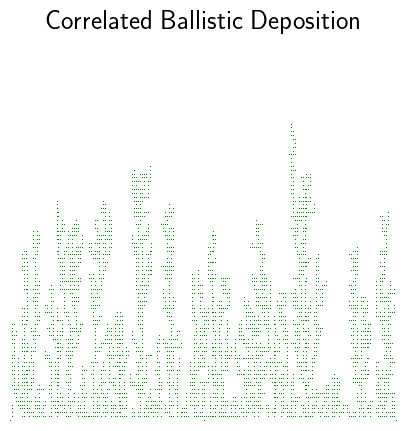

In [33]:
maxi = 100000
npoints = 200

hit = np.zeros(npoints)

x_values = []
y_values = []

oldx = 100
oldy = 0

for i in range(1, maxi + 1):
    r = int(npoints * np.random.random())
    x = r - oldx
    y = hit[r] - oldy
    dist = x * x + y * y

    if dist == 0:
        prob = 1.0
    else:
        prob = 9.0 / dist

    pp = np.random.random()

    if pp < prob:
        if r > 0 and r < npoints - 1:
            if hit[r] >= hit[r - 1] and hit[r] >= hit[r + 1]:
                hit[r] += 1
            else:
                if hit[r - 1] > hit[r + 1]:
                    hit[r] = hit[r - 1]
                else:
                    hit[r] = hit[r + 1]
        oldx = r
        oldy = hit[r]
    olxc = oldx * 2 - 200
    olyc = oldy * 4 - 200
    x_values.append(olxc)
    y_values.append(olyc)

plt.figure(figsize=(5, 5))
plt.plot(x_values, y_values, 'g,')
plt.title('Correlated Ballistic Deposition')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.grid(False)
plt.axis(False)
plt.show()

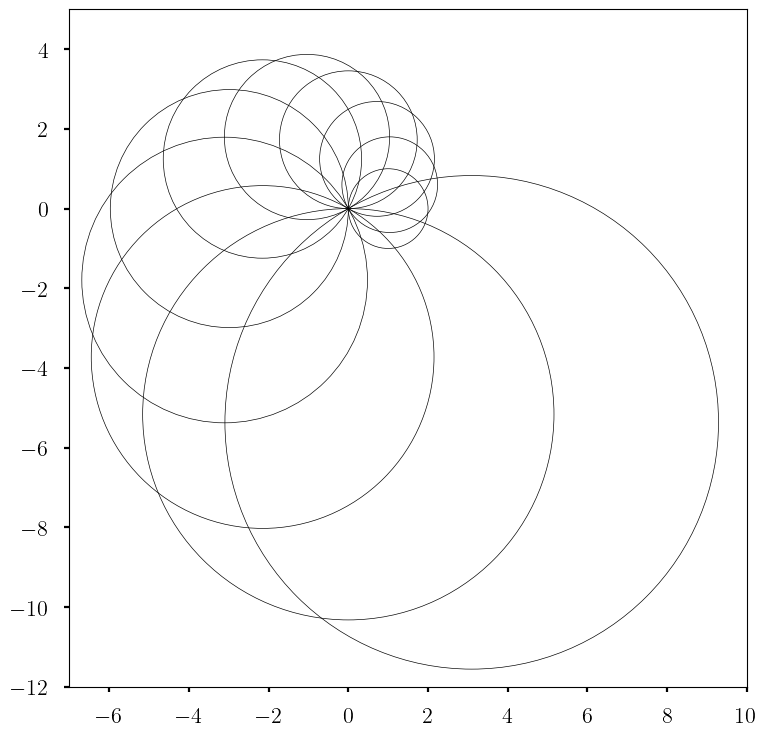

In [34]:
class Chamber:
    def __init__(self, radius, angle):
        self.radius = radius
        self.angle = angle

class Foraminifera:
    def __init__(self, growth_factor, translation_ratio, delta_phi):
        self.growth_factor = growth_factor
        self.translation_ratio = translation_ratio
        self.delta_phi = delta_phi
        self.chambers = []

    def grow(self, num_chambers):
        radius = 1.0
        angle = 0.0

        for _ in range(num_chambers):
            chamber = Chamber(radius, angle)
            self.chambers.append(chamber)

            radius *= self.growth_factor
            angle += self.delta_phi

    def plot(self):
        fig, ax = plt.subplots()

        for i, chamber in enumerate(self.chambers):
            x = chamber.radius * math.cos(chamber.angle)
            y = chamber.radius * math.sin(chamber.angle)
            ax.add_artist(plt.Circle((x, y), chamber.radius, fill=False, color='black'))
            #ax.plot([x, 0], [y, 0], color='black')

        ax.set_aspect('equal')
        ax.set_xlim(-7, 10)
        ax.set_ylim(-12, 5)
        plt.show()

# Example usage
gf = 1.2  # Growth factor
tf = 0.7  # Translation ratio
delta_phi = math.radians(30)  # Angle in radians
foram = Foraminifera(gf, tf, delta_phi)
foram.grow(11)
foram.plot()